In [31]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.utils import shuffle

In [32]:
df = pd.read_parquet('final_data.parquet')

In [33]:
spam_emails = df[df['label'] == 1]
normal_emails = df[df['label'] == 0]

undersampled_normal_emails = normal_emails.sample(n=len(spam_emails), random_state=42)

balanced_df = pd.concat([spam_emails, undersampled_normal_emails])

balanced_df = shuffle(balanced_df, random_state=42)

from sklearn.model_selection import train_test_split

X = balanced_df.drop(columns=['label', 'SourceFile', 'Subject', 'Recipients', 'Sender', 'RawEmailBody', 'PlainTextEmailBody', 'processed_text', 'clean_text', 'sentiment'], axis=1)
y = balanced_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9433651629897926
Recall: 0.9442644199611148
Precision: 0.9433651629897926


<Axes: xlabel='Predicted', ylabel='Actual'>

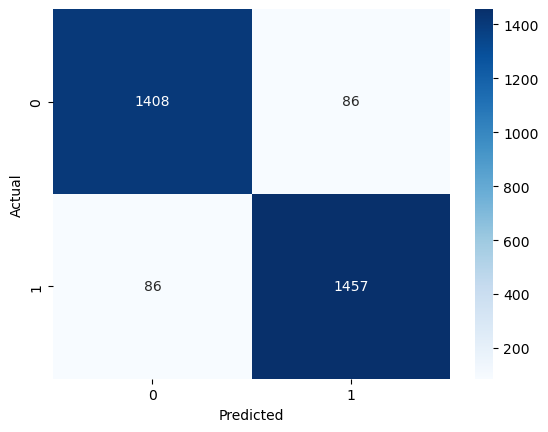

In [46]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm,annot=True,cmap='Blues', fmt='g')

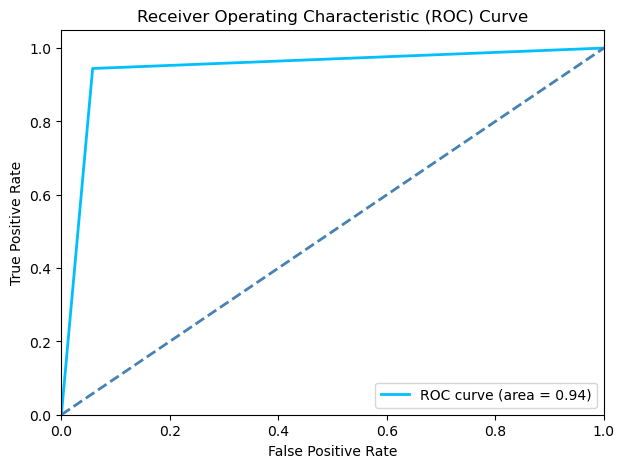

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='deepskyblue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='steelblue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.rcParams['font.family'] = 'sans'  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()